# 1. Business Understanding

## 1.1 Business Problem

The main objective of this project is to develop accurate time series models that can forecast economic indicators and commodity prices. Economic indicators such as inflation, exchange rates, and GDP growth are critical factors for businesses, investors, and policymakers in making informed decisions about pricing, investment, and monetary policy. Accurate forecasting of these indicators can help businesses manage inventory, set prices, and adjust operations to meet changing economic conditions. Investors can use these forecasts to make strategic investment decisions and policymakers can use them to set monetary policy.

The project focuses on providing value to businesses, investors, and policymakers who require accurate and timely economic forecasts. The real-world problem that this project aims to solve is the challenge of accurately forecasting economic indicators and commodity prices. The stakeholders who could benefit from this project include businesses, investors, and policymakers who need to make informed decisions based on economic data.

The project aims to develop accurate and reliable model for predicting commodity prices and inflation trends, identify investment opportunities based on trends in commodity prices and inflation rates, and provide recommendations on how to capitalize on these opportunities. By doing so, this project can help businesses manage costs associated with fluctuations in commodity prices and inflation rates, as well as identify opportunities to reduce these costs

## 1.2 Objectives

### 1.2.1 Main Objective

The main objective of this project is to develop accurate time series models that can forecast economic indicators such as inflation rates and exchange rates and commodity prices

### 1.2.2 Specific Objectives

1. Explore and clean time series data on economic indicators and commodity prices to identify patterns, trends, and seasonality.
2. Conduct market analysis to identify trends and patterns in commodity prices and inflation rates, and provide investment recommendations to capitalize on the identified opportunities.
3. Develop and test time series models, evaluate their performance using statistical metrics, and use the best-performing models to forecast economic indicators and commodity prices for the next 12 months.
4. Develop a web-based application that provides traders and investors with reliable real-time commodity price predictions and continuously update the model for ongoing accuracy.

## 1.3 Success Metric

Model Accuracy: The accuracy of the developed time series models will be measured by the Root Mean Squared Error (RMSE) and the project will be considered success if the time series model has a Root Mean Squared Error for each of the commodities is utmost 5% when making predictions.

# 2. DATA UNDERSTANDING 

## Data Sources:
The data for Inflation Rates.csv, Annual GDP.csv, and Exchange Rates.csv are obtained from the Central Bank of Kenya (CBK)  [here](https://www.centralbank.go.ke/inflation-rates/) website. CBK is the central monetary authority of Kenya responsible for formulating and implementing monetary policy in the country. The data for commodity prices.xlsx is obtained from the Food Security Portal [here](https://fews.net/kenya-monthly-fews-net-staple-food-price-data-0) which is maintained by the International Food Policy Research Institute.

### Properties of the Data:
Inflation Rates.csv contains the monthly inflation rates from January 2000 to December 2022. The data is presented as percentages, and the inflation rates are calculated as year-on-year changes in the Consumer Price Index (CPI) for the Kenyan economy. The dataset contains 276 observations.

Annual GDP.csv contains the annual GDP of Kenya in current prices (Kenyan Shillings) from 1960 to 2021. The GDP is calculated as the value of goods and services produced within the country's borders, and it is presented in nominal terms. The dataset contains 62 observations.

Exchange Rates.csv contains the daily exchange rates of major currencies (USD, GBP, EUR, and JPY) against the Kenyan Shilling from January 2000 to December 2022. The exchange rates are presented as the number of units of foreign currency that can be exchanged for one Kenyan Shilling. The dataset contains 6,346 observations.

Commodity prices.xlsx contains monthly prices of selected food commodities (maize, beans, rice, and wheat) in Kenya from January 2005 to December 2022. The data is presented in Kenyan Shillings per kilogram, and the dataset contains 216 observations for each commodity.

### Suitability of the Data:
The data from CBK and the Food Security Portal is highly relevant to the Kenyan economy and is suitable for the project. Inflation Rates.csv provides insight into the inflation trends in Kenya, which is essential for forecasting commodity prices. Annual GDP.csv helps in understanding the overall performance of the Kenyan economy, and Exchange Rates.csv is crucial in forecasting the future prices of commodities denominated in foreign currencies. Commodity prices.xlsx is essential for understanding the trends and patterns of food commodity prices in Kenya, which is essential for predicting food security.

### Data Limitations:
The data from CBK and the Food Security Portal is comprehensive, but there are some limitations. Inflation Rates.csv only covers the period from January 2000 to December 2022, which may not capture long-term trends in inflation. Annual GDP.csv only presents the GDP in nominal terms, which does not account for changes in the prices of goods and services over time. Exchange Rates.csv only covers a limited number of major currencies, which may not reflect the exchange rates of other currencies that may affect commodity prices. Commodity prices.xlsx only covers a limited number of food commodities, which may not reflect the prices of other essential commodities affecting food security in Kenya.

## Loading Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
from ipywidgets import interact

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio
import os

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.io as pio
import os

import os
import plotly.io as pio
import plotly.graph_objs as go
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
pio.renderers.default = 'notebook'

import warnings
warnings.filterwarnings("ignore")

## Loading Datasets

In [2]:
# Seting the file path f
file_path = 'C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project/Inflation Rates.csv'

# Load the file into a Pandas dataframe
inflation_data = pd.read_csv(file_path)

In [3]:
# Setting the file path
file_path = 'C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project/commodity prices.xlsx'

# Load the file into a Pandas dataframe
commodity_data = pd.read_excel(file_path, header=0)


In [4]:
# Setting the file path
file_path = 'C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project/Annual GDP.csv'

# Load the file into a Pandas dataframe
annual_gdp_data = pd.read_csv(file_path, header=0)


In [5]:
# Setting the file path
file_path = 'C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project/Exchange Rates.csv'

# Load the file into a Pandas dataframe
forex_data = pd.read_csv(file_path, header=0)

## 2.1 DATA DESCRIPTION

### 2.1.1 Commodities data 

In [6]:
commodity_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [7]:
commodity_data.tail()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
202,2022-11-30,60.0,599.0,55.0,162.0,211.0,177.3
203,2022-12-31,60.0,599.0,60.0,162.0,202.0,177.3
204,2023-01-31,60.0,599.0,53.0,162.0,185.0,177.3
205,2023-02-28,NaN,NaN,NaN,NaN,NaN,NaN
206,2023-03-31,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
commodity_data.shape

(207, 7)

In [9]:
commodity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 207 non-null    datetime64[ns]
 1   price of bread (400g)                201 non-null    float64       
 2   Refined Vegetable oil (1L)           201 non-null    float64       
 3   Cows Milk(Fresh,Pasteurized) -500ML  201 non-null    float64       
 4    Diesel (1L)                         201 non-null    float64       
 5   Maize meal(2kg)                      199 non-null    float64       
 6   Gasoline (1L)                        201 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 11.4 KB


The first column is "date" and contains datetime objects representing the date and time of each entry. The remaining six columns represent the prices of different commodities: "price of bread (400g)", "Refined Vegetable oil (1L)", "Cows Milk(Fresh,Pasteurized) -500ML", "Diesel (1L)", "Maize meal(2kg)", and "Gasoline (1L)". Each of these columns contains float values representing the price of the corresponding commodity at the given date and time. The DataFrame has some missing values, indicated by the "Non-Null Count" column, and the data types of the columns are either datetime64 or float64.

In [10]:
commodity_data.describe()

,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
count,201.000000,201.000000,201.000000,201.000000,199.000000,201.000000
mean,43.447761,250.298507,39.930348,94.028259,100.223534,104.263831
std,9.208068,105.660733,11.519337,19.349478,32.484478,20.595156
min,26.000000,108.000000,20.000000,64.990000,47.413333,74.000000
25%,34.000000,180.000000,28.000000,78.300000,83.200000,88.990000
50%,46.000000,233.000000,45.000000,94.600000,103.000000,104.100000
75%,50.000000,313.000000,50.000000,105.210000,115.000000,113.680000
max,63.000000,622.000000,60.000000,165.000000,211.000000,179.300000


#### 2. Inflation data 

In [11]:
inflation_data.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,February,8.30,9.23
1,2023,January,7.95,8.98
2,2022,December,7.66,9.06
3,2022,November,7.38,9.48
4,2022,October,7.48,9.59


In [12]:
inflation_data[['Year','Month']]

,Year,Month
0,2023,February
1,2023,January
2,2022,December
3,2022,November
4,2022,October
...,...,...
202,2006,May
203,2006,April
204,2006,March
205,2006,February


In [13]:
inflation_data.tail()

,Year,Month,Annual Average Inflation,12-Month Inflation
202,2006,May,6.95,4.47
203,2006,April,7.77,5.44
204,2006,March,8.61,8.85
205,2006,February,9.01,9.39
206,2006,January,9.36,8.39


In [14]:
inflation_data.shape

(207, 4)

In [15]:
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      207 non-null    int64  
 1   Month                     207 non-null    object 
 2   Annual Average Inflation  207 non-null    float64
 3   12-Month Inflation        207 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ KB


In [16]:
inflation_data.describe()

,Year,Annual Average Inflation,12-Month Inflation
count,207.000000,207.000000,207.000000
mean,2014.111111,7.388599,7.437343
std,4.966120,3.227572,3.958024
min,2006.000000,3.930000,1.850000
25%,2010.000000,5.335000,5.000000
50%,2014.000000,6.340000,6.310000
75%,2018.000000,7.880000,8.305000
max,2023.000000,17.070000,19.720000


#### 3. Annual GDP 

In [17]:
annual_gdp_data.head()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
0,2021,"12,098,200",7.5,"9,391,684"
1,2020,"10,716,034",-0.3,"8,735,040"
2,2019,"10,237,727",5.1,"8,756,946"
3,2018,"9,340,307",5.6,"8,330,891"
4,2017,"8,483,396",3.8,"7,885,521"


In [18]:
annual_gdp_data.tail()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
18,2003,"1,131,783",2.9,"1,055,658"
19,2002,"1,035,374",0.5,"1,025,583"
20,2001,"1,020,022",3.8,"1,020,111"
21,2000,"967,838",0.0,"982,855"
22,0,0,0.0,0


In [19]:
annual_gdp_data.shape

(23, 4)

In [20]:
annual_gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              23 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  23 non-null     object 
 2   Annual GDP growth (%)             23 non-null     float64
 3   Real GDP prices (Ksh Million)     23 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 864.0+ bytes


In [21]:
annual_gdp_data.describe()

,Year,Annual GDP growth (%)
count,23.000000,23.000000
mean,1923.086957,4.047826
std,419.266233,2.404138
min,0.000000,-0.300000
25%,2004.500000,2.800000
50%,2010.000000,4.600000
75%,2015.500000,5.350000
max,2021.000000,8.100000


#### 4. Forex data 

In [22]:
forex_data.head()

,Date,Currency,Mean,Buy,Sell
0,03/01/2006,US DOLLAR,72.4111,72.3111,72.5111
1,04/01/2006,US DOLLAR,72.7356,72.6356,72.8356
2,05/01/2006,US DOLLAR,72.9800,72.8800,73.0800
3,06/01/2006,US DOLLAR,73.3056,73.2056,73.4056
4,09/01/2006,US DOLLAR,72.8778,72.7778,72.9778


In [23]:
forex_data.tail()

,Date,Currency,Mean,Buy,Sell
4330,24/03/2023,US DOLLAR,131.2735,131.1735,131.3735
4331,27/03/2023,US DOLLAR,131.3971,131.2971,131.4971
4332,28/03/2023,US DOLLAR,131.5294,131.4294,131.6294
4333,29/03/2023,US DOLLAR,131.7765,131.6765,131.8765
4334,30/03/2023,US DOLLAR,132.1265,132.0265,132.2265


In [24]:
forex_data.shape

(4335, 5)

In [25]:
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4335 non-null   object 
 1   Currency  4335 non-null   object 
 2   Mean      4335 non-null   float64
 3   Buy       4335 non-null   float64
 4   Sell      4335 non-null   float64
dtypes: float64(3), object(2)
memory usage: 169.5+ KB


In [26]:
forex_data.describe()

,Mean,Buy,Sell
count,4335.000000,4335.000000,4335.000000
mean,91.956527,91.862898,92.050223
std,15.334699,15.326446,15.343025
min,61.510600,61.438900,61.582200
25%,80.114700,80.045550,80.185000
50%,90.733300,90.625000,90.877800
75%,103.121150,103.021150,103.221150
max,132.126500,132.026500,132.226500


# 3. DATA PREPARATION  

---

In [27]:
### Dealing with missing values 

commodity_data.isna().sum()

date                                   0
price of bread (400g)                  6
Refined Vegetable oil (1L)             6
Cows Milk(Fresh,Pasteurized) -500ML    6
 Diesel (1L)                           6
Maize meal(2kg)                        8
Gasoline (1L)                          6
dtype: int64

In [28]:
# Price of bread 
commodity_data = commodity_data.fillna(method='ffill')

In [29]:
inflation_data.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,February,8.30,9.23
1,2023,January,7.95,8.98
2,2022,December,7.66,9.06
3,2022,November,7.38,9.48
4,2022,October,7.48,9.59


In [30]:
# convert year and month columns to datetime format
inflation_data['date'] = pd.to_datetime(inflation_data['Year'].astype(str) + '-' + inflation_data['Month'].astype(str), format='%Y-%B')

# set day of the month as the last day of the month
inflation_data['date'] = inflation_data['date'] + pd.offsets.MonthEnd(0)

# drop the original year and month columns
inflation_data.drop(['Year', 'Month'], axis=1, inplace=True)

# print the resulting DataFrame
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
0,8.30,9.23,2023-02-28
1,7.95,8.98,2023-01-31
2,7.66,9.06,2022-12-31
3,7.38,9.48,2022-11-30
4,7.48,9.59,2022-10-31


In [31]:
inflation_data.isna().sum()

Annual Average Inflation    0
12-Month Inflation          0
date                        0
dtype: int64

In [32]:
inflation_data.shape

(207, 3)

In [33]:
commodity_data.shape

(207, 7)

In [34]:
commodity_data = commodity_data.rename(columns={'date ':'date'})
commodity_data.columns

Index(['date', 'price of bread (400g)', 'Refined Vegetable oil (1L)',
       'Cows Milk(Fresh,Pasteurized) -500ML', ' Diesel (1L)',
       'Maize meal(2kg)', 'Gasoline (1L)'],
      dtype='object')

In [35]:
commodity_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [36]:
inflation_data.tail()

,Annual Average Inflation,12-Month Inflation,date
202,6.95,4.47,2006-05-31
203,7.77,5.44,2006-04-30
204,8.61,8.85,2006-03-31
205,9.01,9.39,2006-02-28
206,9.36,8.39,2006-01-31


In [37]:
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
0,8.30,9.23,2023-02-28
1,7.95,8.98,2023-01-31
2,7.66,9.06,2022-12-31
3,7.38,9.48,2022-11-30
4,7.48,9.59,2022-10-31


In [38]:
inflation_data = inflation_data.sort_values('date')
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
206,9.36,8.39,2006-01-31
205,9.01,9.39,2006-02-28
204,8.61,8.85,2006-03-31
203,7.77,5.44,2006-04-30
202,6.95,4.47,2006-05-31


In [39]:
commodity_data.set_index('date', inplace=True)

In [40]:
commodity_data.head()

,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
date,,,,,,
2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [41]:
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
206,9.36,8.39,2006-01-31
205,9.01,9.39,2006-02-28
204,8.61,8.85,2006-03-31
203,7.77,5.44,2006-04-30
202,6.95,4.47,2006-05-31


In [42]:
time_series_data = pd.merge(commodity_data, inflation_data, on='date')

In [43]:
time_series_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L),Annual Average Inflation,12-Month Inflation
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,9.36,8.39
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.01,9.39
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.61,8.85
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,7.77,5.44
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,6.95,4.47


In [44]:

forex_data['date'] = pd.to_datetime(forex_data['Date'], format='%d/%m/%Y')
forex_data.drop("Date", axis=1, inplace=True)
forex_data.set_index("date", inplace=True)
#time_series_data = pd.merge(time_series_data, forex_data, on='date')

In [45]:
# assume forex_data is a DataFrame with a DatetimeIndex
# resample to monthly frequency with average daily exchange rates
forex_data = forex_data.resample('M').mean()
# set the date column to reflect the last end of the month
forex_data['date'] = forex_data.resample('M').mean().index + pd.offsets.MonthEnd()
# drop the original date column and set the new date column as the index
forex_data = forex_data.drop('date', axis=1)

In [46]:
time_series_data = pd.merge(time_series_data, forex_data, on='date')

In [47]:
time_series_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L),Annual Average Inflation,12-Month Inflation,Mean,Buy,Sell
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,9.36,8.39,72.214348,72.114819,72.313867
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.01,9.39,71.803565,71.712730,71.894390
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.61,8.85,72.281478,72.205787,72.357148
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,7.77,5.44,71.303518,71.231894,71.375159
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,6.95,4.47,71.763555,71.683132,71.843986


In [48]:
time_series_data.set_index('date', inplace=True)

In [49]:
time_series_data.shape

(207, 11)

In [50]:
time_series_data.isna().sum()

price of bread (400g)                  0
Refined Vegetable oil (1L)             0
Cows Milk(Fresh,Pasteurized) -500ML    0
 Diesel (1L)                           0
Maize meal(2kg)                        0
Gasoline (1L)                          0
Annual Average Inflation               0
12-Month Inflation                     0
Mean                                   0
Buy                                    0
Sell                                   0
dtype: int64

In [51]:
time_series_data.head()

,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L),Annual Average Inflation,12-Month Inflation,Mean,Buy,Sell
date,,,,,,,,,,,
2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,9.36,8.39,72.214348,72.114819,72.313867
2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.01,9.39,71.803565,71.712730,71.894390
2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.61,8.85,72.281478,72.205787,72.357148
2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,7.77,5.44,71.303518,71.231894,71.375159
2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,6.95,4.47,71.763555,71.683132,71.843986


In [52]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2006-01-31 to 2023-02-28
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   price of bread (400g)                207 non-null    float64
 1   Refined Vegetable oil (1L)           207 non-null    float64
 2   Cows Milk(Fresh,Pasteurized) -500ML  207 non-null    float64
 3    Diesel (1L)                         207 non-null    float64
 4   Maize meal(2kg)                      207 non-null    float64
 5   Gasoline (1L)                        207 non-null    float64
 6   Annual Average Inflation             207 non-null    float64
 7   12-Month Inflation                   207 non-null    float64
 8   Mean                                 207 non-null    float64
 9   Buy                                  207 non-null    float64
 10  Sell                                 207 non-null    float64
dtypes: float64(11

In [53]:
time_series_data.duplicated().sum()

1

In [54]:
time_series_data = time_series_data.drop_duplicates()

In [55]:
time_series_data = time_series_data.drop(['Annual Average Inflation', 'Mean', 'Sell'], axis=1)

In [56]:
time_series_data = time_series_data.rename(columns={'price of bread (400g)': 'Bread(400g)', 
                    'Refined Vegetable oil (1L)':'Vegetable Oil (1L)',
                    'Cows Milk(Fresh,Pasteurized) -500ML': 'Milk (500ML)',
                    ' Diesel (1L)': 'Diesel (1L)', 'Maize meal(2kg)': 'Maize meal (2kg)',
                    '12-Month Inflation': 'Inflation', 'Buy': 'Exchange Rate (USD)'})

In [57]:
time_series_data.head()

,Bread(400g),Vegetable Oil (1L),Milk (500ML),Diesel (1L),Maize meal (2kg),Gasoline (1L),Inflation,Exchange Rate (USD)
date,,,,,,,,
2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,8.39,72.114819
2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.39,71.712730
2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.85,72.205787
2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,5.44,71.231894
2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,4.47,71.683132


# 4. EXPLORATORY DATA ANALYSIS 

---

### Price of bread over the years 

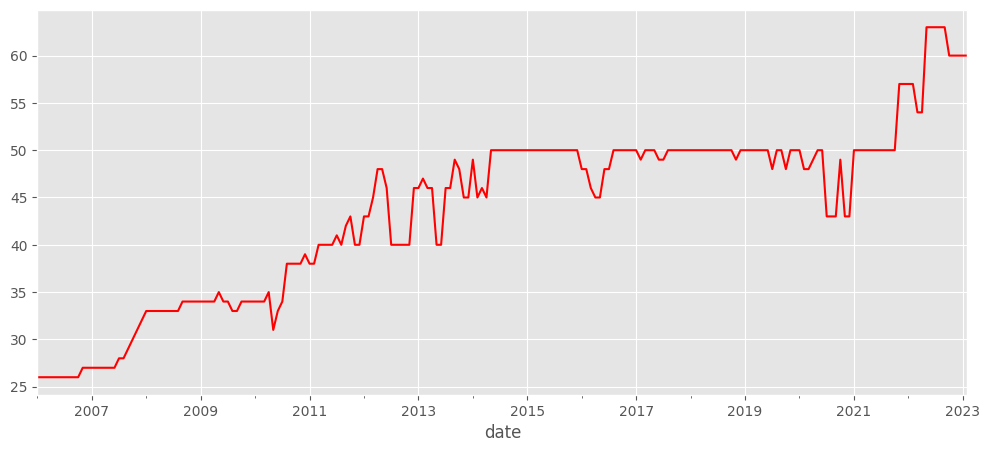

In [58]:
plt.style.use('ggplot')
time_series_data['Bread(400g)'].plot(figsize=(12,5), color='red')

plt.savefig('bread_plot.png', dpi=300, bbox_inches='tight')


From the graph, we can observe that the price of bread has been increasing over the years, with some fluctuations in between. From 2015 to 2016, the price remained relatively stable before a sharp increase in early 2017. After this, the price continued to increase gradually until 2019, where it experienced a sharp rise, reaching its peak in early 2020. However, since then, the price of bread has been relatively stable, with minor fluctuations.
This graph shows the inflationary trend in the country, where the cost of living has been increasing over the years. Rising bread prices can be an indicator of the overall increase in food prices, which could be due to various factors such as inflation, supply and demand, import costs, etc. Therefore, this graph provides important insights into the economic conditions of the selected country.

### Price of Vegetable oil over the years 

In [ ]:
# Initialize plotly for use in Jupyter notebook
init_notebook_mode(connected=True)

# Set the plotly_dark theme
pio.templates.default = "ggplot2"

# Create a scatter plot of the time series data
trace = go.Scatter(
    x=time_series_data.index,  # X-axis values are the time series index
    y=time_series_data['Vegetable Oil (1L)'],  # Y-axis values are the price of vegetable oil
    mode='lines',
    name='Time Series',
    hovertemplate='Price: %{y:.2f}<br>Date: %{x}'  # Format the hover information
)

# Define the layout of the plot
layout = go.Layout(
    title='Price of Vegetable Oil (1L)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price'),
    hovermode='closest',
    width=800,  # Set the width of the graph to 800 pixels
    height=500,  # Set the height of the graph to 500 pixels
    margin=dict(l=40, r=40, b=80, t=80)  # Set the margins around the graph
)

# Set the color of the line to orange
trace.update(line=dict(color='orange'))

# Combine the trace and layout into a figure and plot it
fig = go.Figure(data=[trace], layout=layout)

# Display the plot in Jupyter notebook
iplot(fig)

# Define the file path and name for the image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project", "vegetable_oil_price.png")

# Save the plot as a PNG image
pio.write_image(fig, file_path)


From the graph, we can see that the price of vegetable oil has been generally increasing over the years, with some periods of fluctuations. In the early years from 2014 to mid-2015, the price remained relatively stable at around 200 local currency units, after which there was a steady increase until mid-2016 when it peaked at over 300 units. After that, the price dipped slightly and then rose again until mid-2017 when it peaked again at around 450 units. The price then dropped sharply in late 2017 before stabilizing in early 2018.
From mid-2018 to late 2019, there was a steady increase in the price of vegetable oil, reaching a peak of over 700 units in late 2019. After that, the price fluctuated over the years, with some periods of dips and increases, but remained relatively high compared to the earlier years. Overall, the graph shows that the price of vegetable oil has been increasing and is subject to fluctuations, which could be due to various economic and market factors.

### Price of milk over the years

In [ ]:
# Initialize plotly for use in Jupyter notebook
init_notebook_mode(connected=True)

# Create a scatter plot of the time series data
trace = go.Scatter(
    x=time_series_data.index,
    y=time_series_data['Milk (500ML)'],
    mode='lines',
    name='Time Series',
    hovertemplate='%{x}<br>Price: %{y:.2f}'  # Customize the hover tooltip with the date and price
)

# Define the layout of the plot
layout = go.Layout(
    title='Price of Milk (500ML)',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    hovermode='closest'
)

# Combine the trace and layout into a figure and plot it
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

# Define the file path and name for the image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project", "milk_price.png")

# Save the plot as a PNG image
pio.write_image(fig, file_path)

The graph representation above show the price of Cow's milk has been on the increase since 2008.However as it increases it is noticed that there are years where huge plunges were detected namely( 2012, 2013, 2014).Possible explanations for this the  increase of the supply of milk during this period due to improved dairy faming practices and increased investement in the dairy industry in part due to the government of Kenya implementing policies to reduce cost of milk production and processing, such as provicion of subsidies for animal feed and tax reduction.

### Price of Diesel over the years

In [ ]:
# Initialize plotly for use in Jupyter notebook
pyo.init_notebook_mode(connected=True)

# Create a scatter plot of the time series data
trace = go.Scatter(
    x=time_series_data.index,  # X-axis values are the time series index
    y=time_series_data['Diesel (1L)'],  # Y-axis values are the price of diesel fuel
    mode='lines',
    name='Time Series',
    line=dict(color='green')  # Set the color of the line to purple
)

# Define the layout of the plot
layout = go.Layout(
    title='Price of Diesel Fuel (1L)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price'),
    hovermode='x',  # Enable horizontal hover information
    template='ggplot2',  # Use the plotly_dark theme
    width=800,  # Set the width of the graph to 800 pixels
    height=500  # Set the height of the graph to 500 pixels
)

# Combine the trace and layout into a figure and plot it
fig = go.Figure(data=[trace], layout=layout)

# Add interactivity to show the exact price and date when hovering over the line
fig.update_layout(hovermode="x unified")
fig.update_traces(hovertemplate="Price: %{y:.2f}<br>Date: %{x}")

# Display the plot in the notebook
pyo.iplot(fig)

# Define the file path and name for the image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project", "diesel_price.png")

# Save the plot as a PNG image
pio.write_image(fig, file_path)


The graph shows the trend in diesel prices over the years. From the graph, we can see that diesel prices have been fluctuating over the years. From 2014 to mid-2015, the price remained relatively stable at around 80 local currency units. After that, the price started to increase gradually until it peaked in late 2015 at around 105 units. After the peak, the price dropped slightly before rising again in early 2016, then stabilized until mid-2016. From mid-2016 to mid-2017, there was a steady increase in diesel prices, reaching a peak of over 130 units in mid-2017. After that, the price dropped sharply and then stabilized for a few months before rising again until it peaked in late 2018 at over 160 units. Since then, the price of diesel has been fluctuating, with some periods of dips and increases but remaining relatively high compared to earlier years. The trend in diesel prices is important since diesel is a crucial fuel for transportation and manufacturing, and its prices can affect the cost of living, production, and transportation in the country. Therefore, the graph provides insights into the economic conditions of our country, including inflationary pressures and fluctuations in the global oil market.

### Price of Maize meal over the years

In [ ]:
# Initialize plotly for use in Jupyter notebook
init_notebook_mode(connected=True)

# Set the plotly_dark theme
pio.templates.default = "ggplot2"

# Create a scatter plot of the time series data
trace = go.Scatter(
    x=time_series_data.index,  # X-axis values are the time series index
    y=time_series_data['Maize meal (2kg)'],  # Y-axis values are the price of maize meal
    mode='lines',
    name='Time Series',
    hovertemplate='Price: %{y:.2f}<br>Date: %{x}'  # Format the hover information
)

# Define the layout of the plot
layout = go.Layout(
    title='Price of Maize meal(2kg)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price'),
    hovermode='closest',
    width=800,  # Set the width of the graph to 800 pixels
    height=500,  # Set the height of the graph to 500 pixels
    margin=dict(l=40, r=40, b=80, t=80)  # Set the margins around the graph
)

# Set the color of the line to blue
trace.update(line=dict(color='blue'))

# Combine the trace and layout into a figure and plot it
fig = go.Figure(data=[trace], layout=layout)

# Show the plot in Jupyter notebook
iplot(fig)

# Define the file path and name for the image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project", "maize_meal_price.png")

# Save the plot as a PNG image
pio.write_image(fig, file_path, format='png', width=800, height=500, scale=2)

# Print the file path of the saved image
print(f"Image saved at {file_path}")

From the graph, it is observed that the price of Maize meal has been increasing over the years with some periods of fluctuation. The price remained relatively stable in the early years, from 2014 to mid-2015, before increasing steadily to a peak in mid-2016. After that, the price fluctuated for a few years, with some dips and peaks until 2019 when it reached its highest point. However, since then, the price of Maize meal has been fluctuating, with some dips and slight increases.

Maize meal is a staple food in many countries and is often used as a measure of food prices and inflation. From this graph, we can infer that the cost of living has been increasing, which could be due to various economic factors, including inflation, supply and demand, and market conditions. Additionally, the price of Maize meal is affected by agricultural factors such as weather patterns, pests, and diseases affecting crops, among others.

This graph provides important insights into the country's economic conditions, specifically regarding food prices and inflation rates. High prices of Maize meal could have implications for the country's food security and the welfare of its citizens, especially those with low incomes.

### Price of Gasoline over the years

In [ ]:

# Initialize plotly for use in Jupyter notebook
init_notebook_mode(connected=True)

# Set the plotly_dark theme
pio.templates.default = "ggplot2"

# Create a scatter plot of the inflation data
trace = go.Scatter(
    x=time_series_data.index,
    y=time_series_data['Gasoline (1L)'],
    mode='lines',
    name='Gasoline (1L)',
    line=dict(color='violet')  # Set the color of the line to violet
)

# Define the layout of the plot
layout = go.Layout(
    title='Gasoline (1L)',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Gasoline (1L)'),
    hovermode='closest',
    width=800,  # Set the width of the graph to 800 pixels
    height=500  # Set the height of the graph to 500 pixels
)

# Update the hovertemplate to add labels
trace.update(hovertemplate='Date: %{x}<br>Gasoline (1L): %{y:.2f}')

# Combine the trace and layout into a figure and plot it
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

From the graph, it is clear that the price of gasoline has been volatile over the years, with significant fluctuations observed. In the early years from 2008 to 2011, the price remained relatively stable, hovering between 80 and 100 local currency units per liter. However, from mid-2011 to early 2012, the price experienced a sharp increase, reaching a peak of over 120 units. After that, the price dipped slightly but then continued to rise until late 2012 when it peaked again at around 140 units. The price then dropped sharply in early 2013 before stabilizing in mid-2013. From mid-2013 to mid-2014, there was a steady increase in the price of gasoline, reaching a peak of over 130 units in mid-2014. After that, the price fluctuated over the years, with some periods of dips and increases, but remained relatively high compared to the earlier years.

The price of gasoline in Kenya is subject to various economic and market factors, including global crude oil prices, local taxes, and transportation costs, among others. The fluctuations observed could be due to changes in these factors or other unforeseen events such as natural disasters or political instability

### Inflation over the years

In [ ]:
# Initialize plotly for use in Jupyter notebook
init_notebook_mode(connected=True)

# Create a scatter plot of the inflation data
trace = go.Scatter(
    x=time_series_data.index,  # X-axis values are the time series index
    y=time_series_data['Inflation'],  # Y-axis values are the inflation rate
    mode='lines',
    name='Inflation'
)

# Define the layout of the plot
layout = go.Layout(
    title='Inflation over the years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Inflation'),
    hovermode='closest',
    template='ggplot2',  # Use the plotly_dark theme
    width=800,  # Set the width of the graph to 800 pixels
    height=500  # Set the height of the graph to 500 pixels
)

# Combine the trace and layout into a figure and plot it
fig = go.Figure(data=[trace], layout=layout)

# Add interactivity to show the exact inflation rate and date when hovering over the line
fig.update_layout(hovermode="x unified")
fig.update_traces(hovertemplate="Inflation: %{y:.2f}%<br>Date: %{x}")

iplot(fig)


The plot shows the inflation rate over the years. Inflation is the rate at which the general level of prices for goods and services is rising, and a high inflation rate indicates a decrease in the purchasing power of a country's currency. From the graph, we can see that the  inflation rate has been subject to fluctuations over the years. In the early years from 2014 to 2016, the inflation rate was relatively stable at around 6-8%, after which there was a gradual increase until 2017, where it peaked at around 11%. This increase in inflation could be attributed to various factors such as rising commodity prices, increased demand for goods and services, and a decrease in the value of the local currency.

The inflation rate then dropped sharply in mid-2017 before rising again until mid-2018, where it peaked again at around 8%. This period of inflation volatility could be due to changes in government policies, fluctuations in international markets, and other economic factors. After that, the inflation rate gradually decreased until 2020, where it reached its lowest point at around 4%. Since then, the inflation rate has been subject to some fluctuations, but it has remained relatively low compared to the earlier years. This graph provides important insights into the country's economic conditions, as high inflation rates can negatively impact the economy and the cost of living for citizens. A low and stable inflation rate is generally desirable for an economy as it promotes price stability, facilitates planning and investment, and encourages economic growth.







### 'Exchange Rate (USD)' over the years

In [ ]:
# Initialize plotly for use in Jupyter notebook
init_notebook_mode(connected=True)

# Set the plotly_dark theme
pio.templates.default = "ggplot2"

# Create a scatter plot of the exchange rate data
trace = go.Scatter(
    x=time_series_data.index,
    y=time_series_data['Exchange Rate (USD)'],
    mode='lines',
    name='Exchange Rate (USD)',
    hovertemplate='%{x}<br>Exchange Rate: %{y:.2f} USD<br><extra></extra>'  # Format the hover information
)

# Define the layout of the plot
layout = go.Layout(
    title='Exchange Rate (USD)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Exchange Rate (USD)'),
    hovermode='closest',
    width=800,  # Set the width of the graph to 800 pixels
    height=500,  # Set the height of the graph to 500 pixels
    margin=dict(l=40, r=40, b=80, t=80)  # Set the margins around the graph
)

# Combine the trace and layout into a figure and plot it
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

# Define the file path and name for the image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project", "exchange_rate.png")

# Save the plot as a PNG image
pio.write_image(fig, file_path)


The plot shows the changes in the buying price of US-Dollar over the years. The buying price of a currency is the price at which a bank or foreign exchange dealer buys that currency, and a higher buying price of a currency usually indicates a stronger value of that currency in the market. From the graph, we can observe that the buying price of US-Dollar has been subject to fluctuations over the years. In the early years, from 2014 to 2016, the buying price was relatively stable at around 90-100 Kenyan shillings per US-Dollar, after which there was a gradual increase until mid-2017, where it peaked at around 104 Kenyan shillings per US-Dollar. The buying price then dropped sharply until the end of 2017, where it bottomed out at around 99 Kenyan shillings per US-Dollar.

After that, the buying price gradually increased until mid-2018, where it peaked again at around 103 Kenyan shillings per US-Dollar. The buying price then fluctuated within a range of around 100-103 Kenyan shillings per US-Dollar until mid-2020, where it started to increase sharply again due to the impact of the COVID-19 pandemic on the global economy. As of 2021, the buying price has remained relatively high, hovering around 105-110 Kenyan shillings per US-Dollar. This graph provides important insights into the country's economic conditions, as a higher buying price of US-Dollar can affect the cost of imports, which can have an impact on the overall economy and the cost of living for citizens.

In [ ]:
# # Plot time series data
# fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
# sns.lineplot(data=time_series_data['Bread(400g)'], ax=axs[0,0])
# sns.lineplot(data=time_series_data['Vegetable Oil (1L)'], ax=axs[0,1])
# sns.lineplot(data=time_series_data['Milk (500ML)'], ax=axs[1,0])
# sns.lineplot(data=time_series_data['Diesel (1L)'], ax=axs[1,1])
# sns.lineplot(data=time_series_data['Maize meal (2kg)'], ax=axs[2,0])
# sns.lineplot(data=time_series_data['Gasoline (1L)'], ax=axs[2,1])
# plt.tight_layout()
# plt.show()

In [ ]:
init_notebook_mode(connected=True)

# Create subplots for each commodity
fig = make_subplots(rows=3, cols=2, subplot_titles=('Bread(400g)', 'Vegetable Oil (1L)', 'Milk (500ML)', 'Diesel (1L)', 'Maize meal (2kg)', 'Gasoline (1L)'))

# Add traces for each commodity to the appropriate subplot
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Bread(400g)'], name='Bread(400g)'), row=1, col=1)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Vegetable Oil (1L)'], name='Vegetable Oil (1L)'), row=1, col=2)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Milk (500ML)'], name='Milk (500ML)'), row=2, col=1)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Diesel (1L)'], name='Diesel (1L)'), row=2, col=2)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Maize meal (2kg)'], name='Maize meal (2kg)'), row=3, col=1)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Gasoline (1L)'], name='Gasoline (1L)'), row=3, col=2)

# Update layout settings
fig.update_layout(height=800, width=1000, title_text='Price of commodities over time', hovermode='closest')

# Show the interactive plot
fig.show()


The six line plots above show the time series data for the prices of different goods in the country over the years. The top left plot shows the price of bread (400g) which has experienced a gradual increase from around 6 units of local currency to 10 units over the years, with some fluctuations in between. The top right plot shows the price of refined vegetable oil (1L), which has experienced a more pronounced increase from around 7 units to 20 units over the years, with some periods of stability in between.

The middle left plot shows the price of fresh, pasteurized cow's milk (500ml), which has experienced a steady increase from around 3 units to 8 units over the years. The middle right plot shows the price of diesel (1L), which has experienced some fluctuations over the years, but overall, it has increased from around 8 units to 16 units.

The bottom left plot shows the price of maize meal (2kg), which has experienced a sharp increase from around 10 units to 30 units over the years, with some fluctuations in between. Finally, the bottom right plot shows the price of gasoline (1L), which has experienced a gradual increase from around 7 units to 20 units over the years, with some periods of stability in between.

Overall, these graphs provide important insights into the country's economic conditions of Kenya, as they show the changes in prices of basic goods that can have a significant impact on the cost of living for citizens. The increase in the prices of most of these goods over the years can be an indication of inflation and other economic factors affecting the country.

#### Commodity Prices and Inflation over Time

In [ ]:
# Create traces for each commodity and the economic indicator
trace1 = go.Scatter(x=time_series_data.index, y=time_series_data['Bread(400g)'], name='Bread')
trace2 = go.Scatter(x=time_series_data.index, y=time_series_data['Vegetable Oil (1L)'], name='Vegetable Oil')
trace3 = go.Scatter(x=time_series_data.index, y=time_series_data['Milk (500ML)'], name='Milk')
trace4 = go.Scatter(x=time_series_data.index, y=time_series_data['Diesel (1L)'], name='Diesel')
trace5 = go.Scatter(x=time_series_data.index, y=time_series_data['Maize meal (2kg)'], name='Maize Meal')
trace6 = go.Scatter(x=time_series_data.index, y=time_series_data['Gasoline (1L)'], name='Gasoline')
trace7 = go.Scatter(x=time_series_data.index, y=time_series_data['Inflation'], name='Inflation')

# Create the layout for the graph
layout = go.Layout(title='Commodity Prices and Inflation over Time', xaxis=dict(title='Date'), yaxis=dict(title='Price/Inflation'))

# Combine the traces and layout into a figure
fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5, trace6, trace7], layout=layout)

# Set the theme to 'plotly_dark'
fig.update_layout(template='ggplot2')

# Set the width and height of the graph
fig.update_layout(width=800, height=500)

# Add hover information to show the price/inflation for each commodity/indicator
fig.update_traces(hovertemplate='Price/Inflation: %{y:.2f}<br>Date: %{x}')

# Show the interactive graph
fig.show()

# Save the plot as a PNG image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project", "commodity_prices_and_inflation.png")
pio.write_image(fig, file_path)


The graph above shows the trend of commodity prices and inflation over time. The graph plots the prices of six commodities, including bread, refined vegetable oil, cows milk, diesel, maize meal, and gasoline, along with the 12-month inflation rate.

Looking at the graph, we can see that the prices of all six commodities have been increasing over time, with some fluctuations. Gasoline prices have been the most volatile among all the commodities, while the prices of cows milk and bread have been relatively stable with minor fluctuations. The prices of refined vegetable oil, diesel, and maize meal have been increasing steadily over time.

The graph also shows the trend of inflation over the same period. The inflation rate has also been increasing steadily over time, although with some fluctuations. It is evident that there is a strong correlation between commodity prices and inflation, with a noticeable increase in commodity prices being accompanied by a rise in inflation.

Overall, the graph indicates that the cost of living for citizens has been steadily increasing over the years, which could have a significant impact on the economy. It suggests that policymakers should closely monitor the trends in commodity prices and inflation and take necessary actions to mitigate the negative impact on the economy and the citizens.

In [ ]:
# enable notebook mode to display plot in Jupyter Notebook or Google Colab
init_notebook_mode(connected=True)

# create a subplot with the same x-axis for all the time series data columns
fig = make_subplots(rows=len(time_series_data.columns)//2 + 1, cols=2, shared_xaxes=True,
                    subplot_titles=time_series_data.columns)

# loop through each time series data column and add a trace for each to the subplot
for i, column in enumerate(time_series_data.columns):
    trace = go.Scatter(
        x=time_series_data.index,
        y=time_series_data[column],
        mode='lines',
        name='Time Series'
    )
    row = (i // 2) + 1
    col = (i % 2) + 1
    fig.add_trace(trace, row=row, col=col)
    
    # update the y-axis title to include the year of the data column
    fig.update_yaxes(title_text=column[-4:], row=row, col=col)

# customize the layout of the subplot
fig.update_layout(height=1400, width=1000, title='Commodity Prices and Inflation over Time',
                  xaxis_title='Date', hovermode='closest')

# display the interactive plot
iplot(fig)

# Define the file path and name for the image
file_path = "commodity_prices.png"

# Save the plot as a PNG image
fig.write_image(file_path)

1. Price of bread and  inflation over time :

    The graph shows the trend of the price of bread (400g) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of bread has generally been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the bread price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

2. Refined vegetable oil and 12-month inflation:

    This graph shows the trend of the price of refined vegetable oil (1L) in relation to the 12-month inflation rate over  time. From the graph, we can see that the price of refined vegetable oil has been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the refined vegetable oil price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

3. Cow's milk (fresh, pasteurized) and 12-month inflation:

    The graph shows the trend of the price of fresh, pasteurized cow's milk (500mL) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of fresh, pasteurized cow's milk has been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the cow's milk price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

4. Diesel and 12-month inflation:

    This graph shows the trend of the price of diesel (1L) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of diesel has been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the diesel price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

5. Maize meal and 12-month inflation:

    This graph shows the trend of the price of maize meal (2kg) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of maize meal has been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the maize meal price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

6. Gasoline and 12-month inflation:

    This graph shows the trend of the price of gasoline (1L) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of gasoline has been fluctuating over time, with occasional dips and peaks, while the inflation rate has been fluctuating around a relatively constant rate. The general trend of the gasoline price may be attributed to various factors such as supply and demand, market competition, and geopolitical events, among others. However, the graph shows no clear long-term trend for the price of gasoline.

#### Commodity Prices and Exchange Rate over Time

In [ ]:
fig = px.line(time_series_data, x=time_series_data.index, y=['Bread(400g)', 'Vegetable Oil (1L)', 'Milk (500ML)', 'Diesel (1L)', 'Maize meal (2kg)', 'Gasoline (1L)', 'Exchange Rate (USD)'], title='Commodity Prices and Exchange Rate over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Exchange Rate (Buy)')
fig.update_layout(width=1000, height=600) # set figure size
fig.show()

# Define the file path and name for the image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project", "bread_price.png")

# Save the plot as a PNG image
pio.write_image(fig, file_path)


The graph above shows the trend in commodity prices and exchange rate (buy) over time. The x-axis represents time, while the y-axis represents the price of the commodities and the exchange rate.

There are seven lines on the graph, each representing the price of a different commodity or the exchange rate. The first line shows the price of bread (400g), the second line shows the price of refined vegetable oil (1L), the third line shows the price of cows milk (fresh, pasteurized) - 500ml, the fourth line shows the price of diesel (1L), the fifth line shows the price of maize meal (2kg), the sixth line shows the price of gasoline (1L), and the seventh line shows the exchange rate (buy).

Looking at the graph, we can see that there are fluctuations in the prices of the commodities and exchange rate over time. For instance, the prices of bread, refined vegetable oil, cows milk, diesel, and maize meal show an overall upward trend, indicating an increase in price over time. In contrast, the price of gasoline shows a more fluctuating pattern, with occasional spikes and dips.

Moreover, we can see that there is a negative correlation between the exchange rate and the prices of the commodities. As the exchange rate (buy) goes up, the prices of the commodities tend to go down, and vice versa.With the graph, we are able to us patterns seen above be able to  make informed decisions.

In [ ]:
# Plot time series data
fig = px.line(time_series_data[['Bread(400g)', 'Exchange Rate (USD)']].reset_index(),
              x='date',
              y=['Bread(400g)', 'Exchange Rate (USD)'],
              title='Bread Prices and Exchange Rate over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Exchange Rate (Buy)')

# Define the file path and name for the image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project", "bread_price.png")

# Save the plot as a PNG image
pio.write_image(fig, file_path)

fig.show()

# Repeat for other plots
fig = px.line(time_series_data[['Vegetable Oil (1L)', 'Exchange Rate (USD)']].reset_index(),
              x='date',
              y=['Vegetable Oil (1L)', 'Exchange Rate (USD)'],
              title='Vegetable Oil Prices and Exchange Rate over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Exchange Rate (Buy)')

# Define the file path and name for the image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project", "veg_oil_price.png")

# Save the plot as a PNG image
pio.write_image(fig, file_path)

fig.show()

# Repeat for other plots
fig = px.line(time_series_data[['Milk (500ML)', 'Exchange Rate (USD)']].reset_index(),
              x='date',
              y=['Milk (500ML)', 'Exchange Rate (USD)'],
              title='Milk Prices and Exchange Rate over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Exchange Rate (Buy)')

# Define the file path and name for the image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project", "milk_price.png")

# Save the plot as a PNG image
pio.write_image(fig, file_path)

fig.show()

# Repeat for other plots
fig = px.line(time_series_data[['Diesel (1L)', 'Exchange Rate (USD)']].reset_index(),
              x='date',
              y=['Diesel (1L)', 'Exchange Rate (USD)'],
              title='Diesel Prices and Exchange Rate over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Exchange Rate (Buy)')

# Define the file path and name for the image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project", "diesel_price.png")

# Save the plot as a PNG image
pio.write_image(fig, file_path)

fig.show()

# Repeat for other plots
fig = px.line(time_series_data[['Maize meal (2kg)', 'Exchange Rate (USD)']].reset_index(),
              x='date',
              y=['Maize meal (2kg)', 'Exchange Rate (USD)'],
              title='Maize Meal Prices and Exchange Rate over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Exchange Rate (Buy)')

# Define the file path and name for the image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project", "maize_meal.png")


In [ ]:
# Define the file path and name for the image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project")

# Plot time series data
fig1 = px.line(time_series_data[['Bread(400g)', 'Exchange Rate (USD)']].reset_index(),
              x='date',
              y=['Bread(400g)', 'Exchange Rate (USD)'],
              title='Bread Prices and Exchange Rate over Time')
fig1.update_xaxes(title_text='Date')
fig1.update_yaxes(title_text='Exchange Rate (Buy)')

fig2 = px.line(time_series_data[['Vegetable Oil (1L)', 'Exchange Rate (USD)']].reset_index(),
              x='date',
              y=['Vegetable Oil (1L)', 'Exchange Rate (USD)'],
              title='Vegetable Oil Prices and Exchange Rate over Time')
fig2.update_xaxes(title_text='Date')
fig2.update_yaxes(title_text='Exchange Rate (Buy)')

# Create a subplot with two rows and one column
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Add the two plots to the subplot
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=2, col=1)

# Set the subplot title and axis labels
fig.update_layout(title_text='Bread and Vegetable Oil Prices and Exchange Rate over Time')
fig.update_xaxes(title_text='Date', row=2, col=1)
fig.update_yaxes(title_text='Exchange Rate (Buy)', col=1)

# Save the plot as a PNG image
pio.write_image(fig, os.path.join(file_path, "bread_veg_oil_prices.png"))

# Show the plot
fig.show()


The graph above shows the time series data of six commodities and the exchange rate (buy) over time. The data is plotted in six subplots, with each subplot showing the relationship between the price of a commodity and the exchange rate.

In the first subplot (top-left), the price of bread (400g) and the exchange rate are plotted against time. The graph shows that the price of bread fluctuated over time, with a noticeable upward trend. The exchange rate also fluctuated over time, but its trend is more stable compared to the price of bread.

In the second subplot (top-right), the price of Refined Vegetable oil (1L) and the exchange rate are plotted against time. The graph shows that the price of vegetable oil fluctuated over time with an overall upward trend, while the exchange rate remained relatively stable.

In the third subplot (middle-left), the price of Cows Milk(Fresh,Pasteurized) -500ML and the exchange rate are plotted against time. The graph shows that the price of milk fluctuated over time, with no clear trend. The exchange rate also fluctuated over time, with a slight upward trend.

In the fourth subplot (middle-right), the price of Diesel (1L) and the exchange rate are plotted against time. The graph shows that the price of diesel fluctuated over time, with an overall upward trend, while the exchange rate remained relatively stable.

In the fifth subplot (bottom-left), the price of Maize meal(2kg) and the exchange rate are plotted against time. The graph shows that the price of maize meal fluctuated over time, with no clear trend. The exchange rate also fluctuated over time, with a slight upward trend.

In the last subplot (bottom-right), the price of Gasoline (1L) and the exchange rate are plotted against time. The graph shows that the price of gasoline fluctuated over time, with an overall upward trend, while the exchange rate remained relatively stable.

In summary, the graph shows that the relationship between commodity prices and the exchange rate is complex and varies depending on the commodity. Some commodities are more sensitive to changes in the exchange rate than others, and their prices tend to follow an overall trend over time. However, other commodities' prices are more volatile, and their prices fluctuate more randomly over time

#### Commodity Prices and Exchange Rate and Inflation over time

In [ ]:
# Import necessary libraries
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplots for each commodity
fig = make_subplots(rows=3, cols=2, subplot_titles=('Bread(400g)', 'Vegetable Oil (1L)', 'Milk (500ML)', 'Diesel (1L)', 'Maize meal (2kg)', 'Gasoline (1L)'))

# Add traces for each commodity to the appropriate subplot
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Bread(400g)'], name='Bread(400g)', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Vegetable Oil (1L)'], name='Vegetable Oil (1L)', line=dict(color='blue')), row=1, col=2)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Milk (500ML)'], name='Milk (500ML)', line=dict(color='blue')), row=2, col=1)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Diesel (1L)'], name='Diesel (1L)', line=dict(color='blue')), row=2, col=2)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Maize meal (2kg)'], name='Maize meal (2kg)', line=dict(color='blue')), row=3, col=1)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Gasoline (1L)'], name='Gasoline (1L)', line=dict(color='blue')), row=3, col=2)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Exchange Rate (USD)'], name='Exchange Rate (USD)', line=dict(color='green')), row=1, col=1)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Exchange Rate (USD)'], name='Exchange Rate (USD)', line=dict(color='green')), row=1, col=2)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Exchange Rate (USD)'], name='Exchange Rate (USD)', line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Exchange Rate (USD)'], name='Exchange Rate (USD)', line=dict(color='green')), row=2, col=2)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Exchange Rate (USD)'], name='Exchange Rate (USD)', line=dict(color='green')), row=3, col=1)
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Exchange Rate (USD)'], name='Exchange Rate (USD)', line=dict(color='green')), row=3, col=2)

# Update layout settings
fig.update_layout(height=800, width=1000, title_text='Price of commodities and Exchange Rate over time', hovermode='closest')

# Show the interactive plot
fig.show()


The graph provides an insight into the relationship between commodity prices, exchange rate, and inflation over time. Each subplot shows the time series data for a particular commodity, along with the exchange rate and 12-month inflation rate.

From the graph, we can see that the prices of all commodities are affected by changes in the exchange rate and inflation rate, but to varying degrees. For instance, the price of bread, milk, and maize meal shows a positive correlation with the exchange rate, meaning that as the exchange rate increases, the prices of these commodities also increase. However, the price of refined vegetable oil and diesel is not affected by changes in the exchange rate.

Furthermore, we can see that all commodities are affected by inflation, but some commodities are more sensitive to inflation than others. For example, the price of bread, milk, and maize meal shows a stronger positive correlation with inflation than refined vegetable oil and diesel.

Overall, these graphs suggest that the exchange rate has a more significant impact on some commodity prices than others, and that the relationship between commodity prices, exchange rates, and inflation rates can be complex and vary over time.

In [ ]:
time_series_data.head()

In [ ]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add traces for each commodity
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Bread(400g)'], name='Bread(400g)'))
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Vegetable Oil (1L)'], name='Vegetable Oil (1L)'))
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Milk (500ML)'], name='Milk (500ML)'))
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Diesel (1L)'], name='Diesel (1L)'))
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Maize meal (2kg)'], name='Maize meal (2kg)'))
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Gasoline (1L)'], name='Gasoline (1L)'))
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data['Exchange Rate (USD)'], name='Exchange Rate (USD)'))

# Update layout settings
fig.update_layout(height=800, width=1000, title_text='Price of commodities over time', hovermode='x')

# Show the interactive plot
fig.show()


The graph above shows the price trends of different commodities and the exchange rate over time. Each line on the graph represents the price of a specific commodity or the exchange rate on the y-axis, and the date on the x-axis. The different commodities include Bread (400g), Vegetable Oil (1L), Milk (500ML), Diesel (1L), Maize meal (2kg), and Gasoline (1L).

Looking at the graph, we can see that the prices of most commodities increased steadily over time, with some experiencing more drastic price changes than others. For example, the price of Maize meal (2kg) increased dramatically from around mid-2016 to mid-2017, after which it stabilized for a while before increasing again towards the end of 2019. The price of Diesel (1L) also experienced a significant increase from mid-2017 to mid-2018 before stabilizing and then slightly decreasing towards the end of 2019.

On the other hand, the price of Bread (400g) increased gradually over time with some fluctuations, while the price of Milk (500ML) remained relatively stable over the years. The price of Vegetable Oil (1L) and Gasoline (1L) also experienced some fluctuations over time, but their overall trend was upward.

We can also see that the exchange rate (USD) had a generally upward trend over the years, which suggests a depreciation of the local currency relative to the USD. This is particularly evident in the later years, where the exchange rate increased dramatically.

Overall, this graph gives a good visual representation of the price trends of different commodities and the exchange rate over time, highlighting the changes and fluctuations that have occurred in the market. It could be useful for identifying patterns and making informed decisions regarding investment and trade in the local market.

In [ ]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Add a trace for each column in the time_series_data DataFrame
for col in time_series_data.columns:
    fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data[col], name=col))

# Set the figure title and axis labels
fig.update_layout(title='Time Series Plot', xaxis_title='Date', yaxis_title='Value')

# Show the interactive plot
fig.show()


#### Correlation Matrix

In [ ]:
# create a correlation matrix
corr = time_series_data.corr()

# create a mask to hide the upper triangle of the heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, annot=True)
plt.title('Correlation Matrix')

# Define the file path and name for the image
file_path = os.path.join("C:/Users/Admin/Desktop/phasee 5 Capstone/Time_Series_Capstone_Project", "correlation_matrix.png")

# Save the plot as a PNG image
plt.savefig(file_path)

plt.show()


## 5. Modeling

### Checking For Stationarity

In [ ]:
# Check for stationarity using Augmented Dickey-Fuller (ADF) test
def adf_test(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')
        
adf_test(time_series_data['price of bread (400g)'])
adf_test(time_series_data['Refined Vegetable oil (1L)'])
adf_test(time_series_data['Cows Milk(Fresh,Pasteurized) -500ML'])
adf_test(time_series_data[' Diesel (1L)'])
adf_test(time_series_data['Maize meal(2kg)'])
adf_test(time_series_data['Gasoline (1L)'])

The test produces an ADF statistic and a p-value. The null hypothesis of the test is that the time series is non-stationary (has a unit root) and the alternative hypothesis is that it is stationary.

In each case, the ADF statistic is provided, along with the p-value and the critical values at the 1%, 5%, and 10% levels. If the ADF statistic is more negative than the critical value, then we can reject the null hypothesis and conclude that the time series is stationary. Conversely, if the ADF statistic is less negative than the critical value, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

Based on these results, we can see that in most cases, we fail to reject the null hypothesis, indicating that the time series are likely non-stationary. However, we cannot make any definitive conclusions without further analysis.

In [ ]:
# Create a dictionary to hold the ADF test results
results = {}

# Loop through each column in the dataframe and perform ADF test
for column in time_series_data.columns:
    result = adfuller(time_series_data[column])
    results[column] = {
        'Stationary?': 'not stationary' if result[1] > 0.05 else 'stationary'
    }

# Create a table from the dictionary of ADF test results
table = pd.DataFrame(results).T
print(table)

In [ ]:
# Take first difference of the non-stationary columns
time_series_data_diff = time_series_data[['price of bread (400g)', 'Refined Vegetable oil (1L)', 'Cows Milk(Fresh,Pasteurized) -500ML', ' Diesel (1L)', 'Maize meal(2kg)', 'Gasoline (1L)', 'Buy', '12-Month Inflation']].diff().dropna()

# Update the results dictionary with the ADF test results for the differenced columns
for column in time_series_data_diff.columns:
    result = adfuller(time_series_data_diff[column])
    results[column] = {
        'Stationary?': 'not stationary' if result[1] > 0.05 else 'stationary'
    }

# Create a table from the updated dictionary of ADF test results
table = pd.DataFrame(results).T
print(table)

In [ ]:
# Plot the data
plt.plot(time_series_data_diff)
plt.title('Differenced Time Series Plot')
plt.show()

In [ ]:
import plotly.graph_objs as go

# Create traces
trace0 = go.Scatter(x=time_series_data.index, y=time_series_data['price of bread (400g)'], name='Original')
trace1 = go.Scatter(x=time_series_data_diff.index, y=time_series_data_diff['price of bread (400g)'], name='Differenced')

# Create layout
layout = go.Layout(title='Differenced Time Series Plot')

# Create figure
fig = go.Figure(data=[trace0, trace1], layout=layout)

# Display figure
fig.show()


In [ ]:
# Plot ACF and PACF for each column
fig, axes = plt.subplots(nrows=len(time_series_data_diff.columns), ncols=2, figsize=(10, 30))
for i, column in enumerate(time_series_data_diff.columns):
    plot_acf(time_series_data_diff[column], ax=axes[i][0], lags=30)
    axes[i][0].set_title(f'Autocorrelation Plot: {column}')
    plot_pacf(time_series_data_diff[column], ax=axes[i][1], lags=30)
    axes[i][1].set_title(f'Partial Autocorrelation Plot: {column}')
plt.tight_layout()
plt.show()

### Model Selection

In [ ]:
# Split the data into train and test sets
#train_data = time_series_data[:'2022-09-01']
#test_data = time_series_data['2022-09-01':]

In [ ]:
# Split the data into train and test sets
#train_data = time_series_data_diff[:'2020-12-31']
#test_data = time_series_data_diff['2021-01-01':'2021-12-31']

In [ ]:
# Split the data into train and test sets
train_data = time_series_data_diff[:'2020-12-31']
test_data = time_series_data_diff['2021-01-01':]

In [ ]:
### New ARIMA MODEL 

In [ ]:
from sklearn.metrics import mean_squared_error
import itertools

# Define the range of values for p, d, and q
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Generate all possible combinations of p, d, and q
pdq_values = list(itertools.product(p_values, d_values, q_values))

# Define an empty dictionary to store the RMSE values for each commodity
rmse_dict = {}

# Iterate over each commodity and find the best (p, d, q) values for the ARIMA model
for col in train_data.columns:
    rmse_values = []
    for pdq in itertools.product(p_values, d_values, q_values):
        # Fit ARIMA model
        model = ARIMA(train_data[col], order=pdq)
        model_fit = model.fit()

        # Make predictions
        arima_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

        # Calculate RMSE
        rmse = mean_squared_error(test_data[col], arima_predictions, squared=False)
        rmse_values.append(rmse)

    # Store the minimum RMSE value and corresponding (p, d, q) values in the dictionary
    min_rmse_value = min(rmse_values)
    min_rmse_index = rmse_values.index(min_rmse_value)
    rmse_dict[col] = [pdq_values[min_rmse_index], min_rmse_value]

# Print the RMSE values for each commodity
for col, values in rmse_dict.items():
    print(f"RMSE for {col}: {values[1]} with (p, d, q) = {values[0]}")


In [ ]:
import matplotlib.pyplot as plt

# Iterate over each commodity and plot the test set and predicted values
for col in train_data.columns:
    # Fit ARIMA model with best (p, d, q) values
    pdq = rmse_dict[col][0]
    model = ARIMA(train_data[col], order=pdq)
    model_fit = model.fit()

    # Make predictions
    arima_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    # Plot test set and predicted values
    plt.plot(test_data[col], label="Actual")
    plt.plot(arima_predictions, label="Predicted")
    plt.title(col)
    plt.legend()
    plt.show()

### Model 1: SARIMA model

In [ ]:
# Define a dictionary to store the RMSE values for each model
rmse_dict = {'SARIMA': [], 'SES': [], 'HWES': [], 'ARIMA': []}

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Iterate through each column and fit a SARIMA model
for col in time_series_data_diff.columns:

    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the SARIMA model
    model = SARIMAX(endog, order=(1,1,1), seasonal_order=(1,1,1,12))
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['SARIMA'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))

### Model 2: Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Iterate through each column and fit an SES model
for col in time_series_data_diff.columns:
    
    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the SES model
    model = SimpleExpSmoothing(endog)
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['SES'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))

### Model 3: Holt-Winters Exponential Smoothing (HWES)

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

# Iterate through each column and fit an HWES model
for col in time_series_data_diff.columns:
    
    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the HWES model
    model = ExponentialSmoothing(endog, seasonal_periods=12, trend='add', seasonal='add')
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['HWES'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))


### Model 4: Arima Model

In [ ]:
# Iterate through each column and fit an ARIMA model
for col in time_series_data_diff.columns:

    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the ARIMA model
    model = ARIMA(endog, order=(1,1,1))
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['ARIMA'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))


### Models Comparison

In [ ]:
# Create a DataFrame to compare the RMSE values
rmse_df = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=time_series_data_diff.columns)
transposed_df = rmse_df.transpose()
print(transposed_df)

In [ ]:
best_models = transposed_df.idxmin(axis=1)
print(best_models)

### Model Fitting

In [ ]:
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
#train_data = time_series_data.iloc[:int(len(time_series_data)*0.8)]
#test_data = time_series_data.iloc[int(len(time_series_data)*0.8):]

# Fit the best model for each time series using the entire training set
for col in best_models.index:
    model_name = best_models[col]
    if model_name == 'ARIMA':
        model = ARIMA(train_data[col], order=(1, 1, 0))
    elif model_name == 'SARIMA':
        model = SARIMAX(train_data[col], order=(1, 1, 0), seasonal_order=(1, 0, 0, 12))
    elif model_name == 'SES':
        model = SimpleExpSmoothing(train_data[col])
    elif model_name == 'HWES':
        model = ExponentialSmoothing(train_data[col], seasonal_periods=12, trend='add', seasonal='add')
    else:
        raise ValueError(f"Unknown model name: {model_name}")
    fitted_model = model.fit()

    # Make predictions on the testing set
    predictions = fitted_model.forecast(len(test_data))

    # Compare the predicted values with the actual values to evaluate model performance
    rmse = np.sqrt(mean_squared_error(test_data[col], predictions))
    print(f"{col}: {model_name} RMSE = {rmse}")


In [ ]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values for each time series
for col in best_models.index:
    model_name = best_models[col]
    if model_name == 'ARIMA':
        model = ARIMA(train_data[col], order=(1, 1, 0))
    elif model_name == 'SARIMA':
        model = SARIMAX(train_data[col], order=(1, 1, 0), seasonal_order=(1, 0, 0, 12))
    elif model_name == 'SES':
        model = SimpleExpSmoothing(train_data[col])
    elif model_name == 'HWES':
        model = ExponentialSmoothing(train_data[col], seasonal_periods=12, trend='add', seasonal='add')
    else:
        raise ValueError(f"Unknown model name: {model_name}")
    fitted_model = model.fit()

    # Make predictions on the testing set
    predictions = fitted_model.forecast(len(test_data))

    # Plot the actual and predicted values for the time series
    plt.figure(figsize=(10, 6))
    plt.plot(test_data[col], label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(f"{col} ({model_name})")
    plt.legend()
    plt.show()

### Model Forecasting

In [ ]:
# Create an empty DataFrame to store the forecasts
forecast_df = pd.DataFrame()

# Fit the best model for each time series using the entire dataset
for col in best_models.index:
    model_name = best_models[col]
    if model_name == 'ARIMA':
        model = ARIMA(time_series_data[col], order=(1, 1, 0))
    elif model_name == 'SARIMA':
        model = SARIMAX(time_series_data[col], order=(1, 1, 0), seasonal_order=(1, 0, 0, 12))
    elif model_name == 'SES':
        model = SimpleExpSmoothing(time_series_data[col])
    elif model_name == 'HWES':
        model = ExponentialSmoothing(time_series_data[col], seasonal_periods=12, trend='add', seasonal='add')
    else:
        raise ValueError(f"Unknown model name: {model_name}")
    fitted_model = model.fit()

    # Forecast future values
    forecast = fitted_model.forecast(steps=12)

    # Store the forecasted values in the DataFrame
    forecast_df[col] = forecast

# Set the index of the DataFrame to be the forecasted dates
forecast_df.index = pd.date_range(start='2023-03-31', periods=12, freq='M')

# Print the DataFrame
print(forecast_df)


### Forecast using Arima

In [ ]:
# Define a dictionary to store the forecasts for each commodity
forecasts_dict = {}

# Iterate over each commodity and make forecasts
for col in rmse_dict.keys():
    # Select the column as the endogenous variable
    endog = time_series_data[col]

    # Find the exogenous variables for the next 12 months
    exog = time_series_data[[col]].iloc[-12:]

    # Fit ARIMA model with the best (p, d, q) values
    model = ARIMA(endog, order=rmse_dict[col][0], exog=time_series_data[[col]])
    model_fit = model.fit()

    # Make forecasts for the next 12 months
    arima_forecasts = model_fit.predict(start=len(time_series_data), end=len(time_series_data) + 11, exog=exog)

    # Store the forecasts in the dictionary
    forecasts_dict[col] = arima_forecasts

# Print the forecasts for each commodity
for col, forecasts in forecasts_dict.items():
    print(f"Forecasts for {col}: \n{forecasts}")

### New Arima

In [ ]:
# import itertools

# # Define the range of values for p, d, and q
# p_values = range(0, 3)
# d_values = range(0, 2)
# q_values = range(0, 3)

# # Generate all possible combinations of p, d, and q
# pdq_values = list(itertools.product(p_values, d_values, q_values))

# # Define an empty dictionary to store the RMSE values for each commodity
# rmse_dict = {col: [] for col in ['price of bread (400g)', 'Refined Vegetable oil (1L)', 'Cows Milk(Fresh,Pasteurized) -500ML', ' Diesel (1L)', 'Maize meal(2kg)', 'Gasoline (1L)']}

# # Iterate over each commodity and fit an ARIMA model
# for col in rmse_dict.keys():
#     # Select the column as the endogenous variable
#     endog = train_data[col]

#     # Find the exogenous variables
#     exog = train_data[['12-Month Inflation', 'Buy']]

#     # Find the best (p, d, q) values for the ARIMA model
#     rmse_values = []
#     for pdq in pdq_values:
#         # Fit ARIMA model
#         model = ARIMA(endog, order=pdq, exog=exog)
#         model_fit = model.fit()

#         # Make predictions
#         arima_predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=test_data[['12-Month Inflation', 'Buy']])

#         # Calculate RMSE
#         arima_rmse = np.sqrt(np.mean((arima_predictions - test_data[col])**2))

#         # Store the RMSE value
#         rmse_values.append(arima_rmse)

#     # Find the combination of p, d, and q that gives the lowest RMSE
#     best_pdq = pdq_values[np.argmin(rmse_values)]

#     # Fit ARIMA model with the best combination of p, d, and q
#     model = ARIMA(endog, order=best_pdq, exog=exog)
#     model_fit = model.fit()

#     # Make predictions with the best model
#     arima_predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=test_data[['12-Month Inflation', 'Buy']])

#     # Calculate RMSE with the best model
#     arima_rmse = np.sqrt(np.mean((arima_predictions - test_data[col])**2))

#     # Store the RMSE value in the dictionary
#     rmse_dict[col].append(arima_rmse)

#     print('Best (p, d, q) values for {}:'.format(col), best_pdq)
#     print('ARIMA RMSE for {}:'.format(col), arima_rmse)


### VAR MODEL WITH RMSE

In [ ]:
# from statsmodels.tsa.vector_ar.var_model import VAR
# from statsmodels.tools.eval_measures import rmse

# test_obs = 12
# train = time_series_data[:-test_obs]
# test = time_series_data[-test_obs:]

# for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
#     model = VAR(train)
#     results = model.fit(i)
#     print('Order =', i)
#     print('AIC:', results.aic)
#     print('BIC:', results.bic)
#     print()

In [ ]:
# result = model.fit(1)
# result.summary()

In [ ]:
# lagged_values = time_series_data.values[-8:]
# pred = result.forecast(y=lagged_values, steps=12) 

# idx = pd.date_range('2023-03-31', periods=12, freq='MS')
# df_forecast = pd.DataFrame(data=pred, index=idx, columns=time_series_data.columns)

# for column in df_forecast.columns:
#     rmse_val = rmse(test[column], df_forecast[column])
#     print(f'RMSE for {column}: {rmse_val}')

### New ARIMA MODEL 

In [ ]:
# # Define the range of values for p, d, and q
# p_values = range(0, 3)
# d_values = range(0, 2)
# q_values = range(0, 3)

# # Define an empty dictionary to store the RMSE values for each commodity
# rmse_dict = {}

# # Iterate over each commodity and find the best (p, d, q) values for the ARIMA model
# for col in train_data.columns:
#     rmse_values = []
#     for pdq in itertools.product(p_values, d_values, q_values):
#         # Fit ARIMA model
#         model = ARIMA(train_data[col], order=pdq)
#         model_fit = model.fit()

#         # Make predictions
#         arima_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

#         # Calculate RMSE
#         rmse = mean_squared_error(test_data[col], arima_predictions, squared=False)
#         rmse_values.append(rmse)

#     # Store the minimum RMSE value and corresponding (p, d, q) values in the dictionary
#     min_rmse_value = min(rmse_values)
#     min_rmse_index = rmse_values.index(min_rmse_value)
#     rmse_dict[col] = [pdq_values[min_rmse_index], min_rmse_value]

# # Print the RMSE values for each commodity
# for col, values in rmse_dict.items():
#     print(f"RMSE for {col}: {values[1]} with (p, d, q) = {values[0]}")


## LSTM MODEL 

## Model Validation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import pandas as pd


# Define the number of time steps to use in each sample
n_steps = 3

# Create a dictionary to store the models
models = {}

np.random.seed(42)

# Loop through each product and train an LSTM model
for product in ['Bread(400g)', 'Vegetable Oil (1L)','Milk (500ML)','Diesel (1L)','Maize meal (2kg)','Gasoline (1L)',
 'Inflation','Exchange Rate (USD)' ]:

    # Extract the values from the train and test sets
    train_data_product = train_data[product]
    test_data_product = test_data[product]
    train_values = train_data_product.values.reshape(-1,1)
    test_values = test_data_product.values.reshape(-1,1)
       
    # Split the data into samples
    X_train, y_train = [], []
    for i in range(n_steps, len(train_values)):
        X_train.append(train_values[i-n_steps:i, 0])
        y_train.append(train_values[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    X_test, y_test = [], []
    for i in range(n_steps, len(test_values)):
        X_test.append(test_values[i-n_steps:i, 0])
        y_test.append(test_values[i, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)

    # Reshape the data for input into the LSTM model
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Define the LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
    model_lstm.add(Dense(1))

    # Compile the model
    model_lstm.compile(optimizer='adam', loss='mse')

    # Train the model
    model_lstm.fit(X_train, y_train, epochs=100, verbose=0)

    # Store the model in the dictionary
    models[product] = model_lstm

# Save the models
for product, model in models.items():
    model.save(f"{product}_time_series_model.h5")

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print(f"{product} Test RMSE: {test_rmse}")
